In [4]:
import pandas as pd
from readresults.readres_mvpa import merge_results, parse_roi_info, exclude_participants, fill_in_nvoxels
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mne.stats import permutation_cluster_1samp_test
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def df_to_array_tfce(df, measure='correct'):
    """
    """
    subxvoxels = np.zeros((df.subject.nunique(), df.nvoxels.nunique()))
    for i, sub in enumerate(np.sort(df.subject.unique())):
        for j, nv in enumerate(np.sort(df.nvoxels.unique())):
            thisdata = df[(df['subject']==sub)&(df['nvoxels']==nv)]
            subxvoxels[i, j] = thisdata[measure].values
    return subxvoxels

In [6]:
res_list = ['../../../MVPA_results/results_main_nothresh.csv']
results = merge_results(res_list)

In [7]:
results = parse_roi_info(results)
results = exclude_participants(results)
#results = fill_in_nvoxels(results)

In [9]:
results.nvoxels.unique()

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200,
       2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300,
       3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400,
       4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500,
       5600, 5700, 5800, 5900, 6000])

In [10]:
meanres = results.groupby(['roi', 'subject', 'hemi', 'nvoxels']).mean().reset_index()

In [12]:
meanres.roi.unique()

array(['ba-17-18', 'ba-19-37'], dtype=object)

In [29]:
subxvoxels = df_to_array_tfce(meanres[meanres['roi']=='ba-19-37'].groupby(['subject', 'nvoxels']).mean().reset_index(),
                              measure='distance')
threshold_tfce = dict(start=0, step=0.01)
_, _, tfce_pvals, _ = permutation_cluster_1samp_test(
    subxvoxels, n_jobs=1, threshold=threshold_tfce, adjacency=None,
    n_permutations=10000, out_type='mask') #10000

stat_fun(H1): min=0.911120 max=3.369036
Running initial clustering
Using 337 thresholds from 0.00 to 3.36 for TFCE computation (h_power=2.00, e_power=0.50)
Found 60 clusters
Permuting 9999 times...


  0%|          |  : 0/9999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [30]:
tfce_pvals

array([0.7683, 0.5647, 0.3168, 0.1998, 0.1387, 0.1264, 0.1306, 0.0958,
       0.0768, 0.0572, 0.0958, 0.0815, 0.094 , 0.08  , 0.0739, 0.1026,
       0.08  , 0.08  , 0.0707, 0.0739, 0.0898, 0.0627, 0.0523, 0.0523,
       0.0564, 0.051 , 0.0432, 0.0465, 0.0421, 0.0395, 0.0362, 0.0311,
       0.0236, 0.0219, 0.0236, 0.0214, 0.0244, 0.0219, 0.0214, 0.0205,
       0.0167, 0.0172, 0.0156, 0.0144, 0.0148, 0.0127, 0.0127, 0.0125,
       0.0111, 0.0111, 0.0108, 0.0116, 0.0106, 0.0125, 0.0127, 0.0126,
       0.0118, 0.0118, 0.0127, 0.0135])

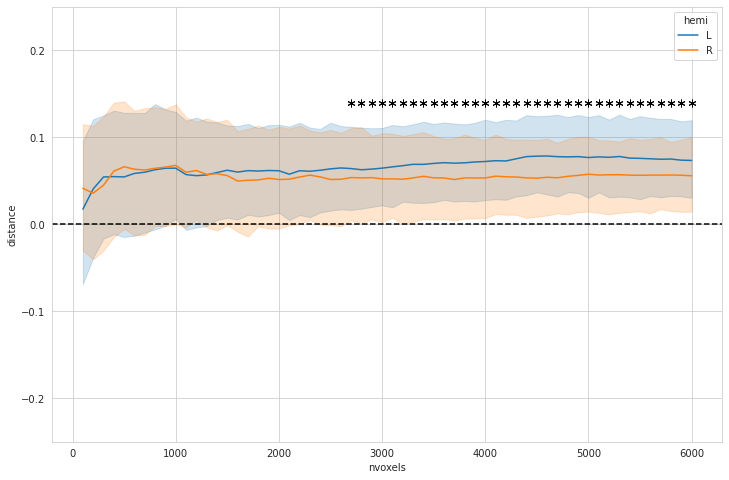

In [31]:
_, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim([-0.25, 0.25])
nvoxels = list(meanres.nvoxels.unique())
sns.set_style('whitegrid')
sns.lineplot(data=meanres[meanres['roi']=='ba-19-37'], x='nvoxels',
             y='distance', hue='hemi', ax=ax, ci=95)
plt.axhline(y = 0.0, color = 'k', linestyle = '--') 
for x in range(len(tfce_pvals)):
    if tfce_pvals[x] < 0.01:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0),s=50,color='k',linewidths=1.)
        ax.scatter(nvoxels[x], 0.16, marker=(6,2,0), s=50, color='k', linewidths=1.)
    elif tfce_pvals[x] < 0.05:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0), s=50, color='k', linewidths=1.)

In [24]:
subxvoxels = df_to_array_tfce(meanres[meanres['roi']=='ba-17-18'].groupby(['subject', 'nvoxels']).mean().reset_index(),
                              measure='distance')
threshold_tfce = dict(start=0, step=0.01)
_, _, tfce_pvals, _ = permutation_cluster_1samp_test(
    subxvoxels, n_jobs=1, threshold=threshold_tfce, adjacency=None,
    n_permutations=1000, out_type='mask') #10000

stat_fun(H1): min=1.049460 max=1.931735
Running initial clustering
Using 194 thresholds from 0.00 to 1.93 for TFCE computation (h_power=2.00, e_power=0.50)
Found 60 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [25]:
tfce_pvals

array([0.604, 0.527, 0.585, 0.572, 0.46 , 0.456, 0.306, 0.298, 0.306,
       0.33 , 0.326, 0.32 , 0.379, 0.409, 0.357, 0.32 , 0.333, 0.333,
       0.311, 0.326, 0.326, 0.34 , 0.333, 0.32 , 0.292, 0.266, 0.238,
       0.233, 0.24 , 0.233, 0.225, 0.219, 0.206, 0.206, 0.215, 0.219,
       0.213, 0.205, 0.196, 0.189, 0.18 , 0.18 , 0.18 , 0.18 , 0.176,
       0.176, 0.169, 0.169, 0.168, 0.168, 0.168, 0.168, 0.168, 0.167,
       0.167, 0.167, 0.167, 0.167, 0.167, 0.167])

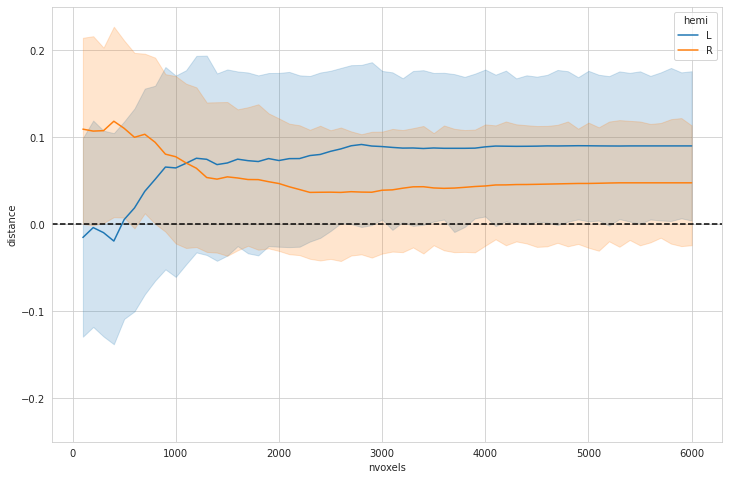

In [28]:
_, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim([-0.25, 0.25])
nvoxels = list(meanres.nvoxels.unique())
sns.set_style('whitegrid')
sns.lineplot(data=meanres[meanres['roi']=='ba-17-18'], x='nvoxels',
             y='distance', hue='hemi', ax=ax, ci=95)
plt.axhline(y = 0.0, color = 'k', linestyle = '--') 
for x in range(len(tfce_pvals)):
    if tfce_pvals[x] < 0.01:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0),s=50,color='k',linewidths=1.)
        ax.scatter(nvoxels[x], 0.16, marker=(6,2,0), s=50, color='k', linewidths=1.)
    elif tfce_pvals[x] < 0.05:
        ax.scatter(nvoxels[x], 0.14, marker=(6,2,0), s=50, color='k', linewidths=1.)

In [37]:
subxvoxels = df_to_array_tfce(meanres[(meanres['roi']=='ba-19')&(meanres['hemi']=='R')],
                              measure='distance')
threshold_tfce = dict(start=0, step=0.01)
_, _, tfce_pvals, _ = permutation_cluster_1samp_test(
    subxvoxels, n_jobs=1, threshold=threshold_tfce, adjacency=None,
    n_permutations=1000, out_type='mask') #10000

stat_fun(H1): min=0.645831 max=2.122324
Running initial clustering
Using 213 thresholds from 0.00 to 2.12 for TFCE computation (h_power=2.00, e_power=0.50)
Found 10 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [38]:
tfce_pvals

array([0.819, 0.61 , 0.458, 0.297, 0.294, 0.236, 0.138, 0.091, 0.149,
       0.105])

In [39]:
subxvoxels = df_to_array_tfce(meanres[(meanres['roi']=='ba-19')&(meanres['hemi']=='L')],
                              measure='distance')
threshold_tfce = dict(start=0, step=0.01)
_, _, tfce_pvals, _ = permutation_cluster_1samp_test(
    subxvoxels, n_jobs=1, threshold=threshold_tfce, adjacency=None,
    n_permutations=1000, out_type='mask') #10000

stat_fun(H1): min=0.211648 max=1.931702
Running initial clustering
Using 194 thresholds from 0.00 to 1.93 for TFCE computation (h_power=2.00, e_power=0.50)
Found 10 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [40]:
tfce_pvals

array([0.998, 0.324, 0.23 , 0.258, 0.298, 0.173, 0.223, 0.195, 0.163,
       0.157])

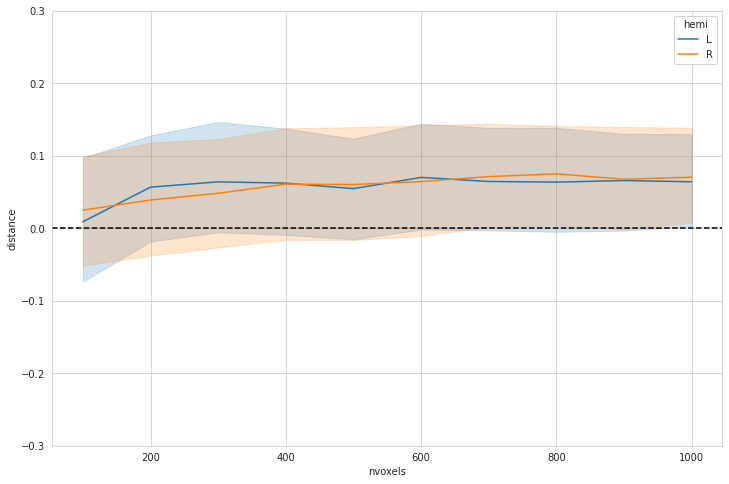

In [56]:
_, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim([-0.3, 0.3])
sns.set_style('whitegrid')
sns.lineplot(data=meanres[meanres['roi']=='ba-19'], x='nvoxels',
             y='distance', hue='hemi', ax=ax, ci=95)
plt.axhline(y = 0.0, color = 'k', linestyle = '--') 

## Full ROIs

In [44]:
res_list = ['../../../MVPA_results/results_main_fullrois.csv']
fullroiresults = merge_results(res_list)
fullroiresults = parse_roi_info(fullroiresults)
fullroiresults = exclude_participants(fullroiresults)

In [45]:
fullroi_meanres = fullroiresults.groupby(['roi', 'subject', 'hemi']).mean().reset_index()

<AxesSubplot:xlabel='roi', ylabel='distance'>

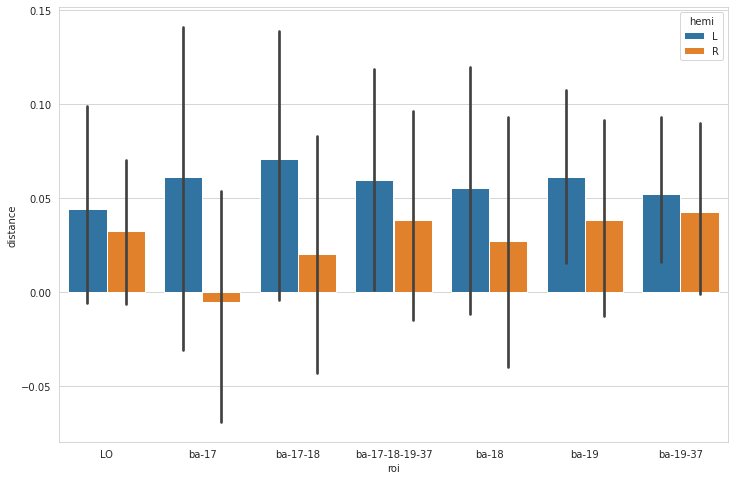

In [48]:
plt.subplots(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=fullroi_meanres, 
            x='roi', y='distance',
            hue='hemi', ci=95)

In [60]:
x=float('-inf')

In [61]:
x==float('-inf')

True

In [10]:
MVPAres.groupby(['roi', 'testmodel']).mean()

correct    output   rawdistance  distance  runno  \
roi        testmodel                                                      
LO_L       3          0.562500  0.500000 -5.203555e-02  0.303416    4.5   
           6          0.591667  0.525000 -7.715745e-03  0.126060    2.0   
LO_R       3          0.562500  0.500000  2.873767e-02  0.290023    4.5   
           6          0.500000  0.466667  2.713797e-07  0.034675    2.0   
ba-17-18_L 3          0.843750  0.468750 -5.531191e-02  0.602125    4.5   
           6          0.716667  0.450000  1.302044e-07  0.431098    2.0   
ba-17-18_R 3          0.812500  0.500000  6.353730e-02  0.679119    4.5   
           6          0.683333  0.533333  1.264045e-07  0.384545    2.0   

                      trainmodel  
roi        testmodel              
LO_L       3                 6.0  
           6                 3.0  
LO_R       3                 6.0  
           6                 3.0  
ba-17-18_L 3                 6.0  
           6                 3.0  
ba-17-18_R 3                 6.0  
           6                 3.0